In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
%matplotlib inline

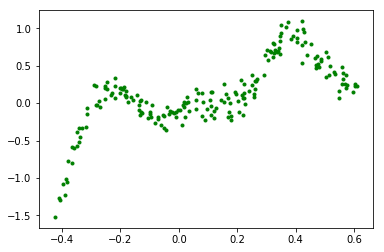

In [6]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [11]:
## defining the model
n_hidden = 3
optimizer = tnn.Adam(learning_rate=0.003)
layer1prob = tnn.NonLinearLayer(1, n_hidden, activation=tnn.Softmax(), optimizer=optimizer)
layer1reg = tnn.LinearLayer(1, n_hidden, optimizer=optimizer)
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=optimizer)

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    probs = layer1prob.forward(xx)
    regs = layer1reg.forward(xx)
    a1 = probs*regs
    y_out = layer2.forward(a1)

    loss = tnn.MseLoss.loss(y_out, yy)
    dy = tnn.MseLoss.del_loss(y_out, yy)
    
    da1 = layer2.backward(dy)
    dxp = layer1prob.backward(da1)
    dxr = layer1reg.backward(da1)
    dx = dxp + dxr
    
    layer1prob.update()
    layer1reg.update()
    layer2.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
#         plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.11443170219727423

_______________________
epoch 100
Loss 0.08129021473777177

_______________________
epoch 200
Loss 0.06230440053239618

_______________________
epoch 300
Loss 0.058564645372650014

_______________________
epoch 400
Loss 0.057670781049860474

_______________________
epoch 500
Loss 0.05661952725209717

_______________________
epoch 600
Loss 0.05579215225776475

_______________________
epoch 700
Loss 0.05505453132416932

_______________________
epoch 800
Loss 0.054291215097999126

_______________________
epoch 900
Loss 0.0534586032011439

_______________________
epoch 1000
Loss 0.0525586621885409

_______________________
epoch 1100
Loss 0.05162593121827596

_______________________
epoch 1200
Loss 0.050710052319183775

_______________________
epoch 1300
Loss 0.049859564695157434

_______________________
epoch 1400
Loss 0.04912857128267448

_______________________
epoch 1500
Loss 0.04859479811123351

_______________________
epoch 160


_______________________
epoch 13500
Loss 0.05054910260763263

_______________________
epoch 13600
Loss 0.05054860571890463

_______________________
epoch 13700
Loss 0.05054807841598442

_______________________
epoch 13800
Loss 0.05054591483761811

_______________________
epoch 13900
Loss 0.0505452665774056

_______________________
epoch 14000
Loss 0.050544601299686194

_______________________
epoch 14100
Loss 0.0505438725238542

_______________________
epoch 14200
Loss 0.05054149886412441

_______________________
epoch 14300
Loss 0.05054063250420387

_______________________
epoch 14400
Loss 0.05053973869687965

_______________________
epoch 14500
Loss 0.050538794714271036

_______________________
epoch 14600
Loss 0.05053626602700802

_______________________
epoch 14700
Loss 0.050535254601857975

_______________________
epoch 14800
Loss 0.05053423880792974

_______________________
epoch 14900
Loss 0.05053321779387132

_______________________
epoch 15000
Loss 0.05053069454601841

______

TclError: invalid command name "pyimage74"

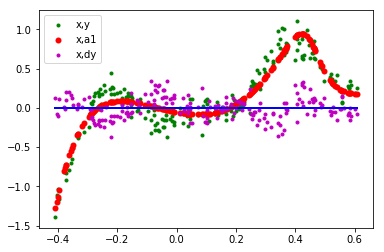

In [5]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.legend()

In [6]:
layer1prob.output.max(axis=1)

array([0.9280685 , 0.9338374 , 0.93474296, 0.92600652, 0.9247787 ,
       0.93869569, 0.93562663, 0.94493274, 0.94166058, 0.92293263,
       0.94073169, 0.93575201, 0.94003782, 0.9448615 , 0.94724753,
       0.944576  , 0.95054513, 0.95045902, 0.9501014 , 0.95033607,
       0.95019524, 0.94791863, 0.95122621, 0.94967058, 0.95121245,
       0.95074895, 0.95121914, 0.95004763, 0.9512503 , 0.95095618,
       0.95116031, 0.95124631, 0.95114166, 0.95092328, 0.95100939,
       0.95017411, 0.94476716, 0.94991464, 0.95022992, 0.9497396 ,
       0.94647403, 0.94679011, 0.94849556, 0.94580017, 0.94949473,
       0.94748796, 0.94381764, 0.94412398, 0.94436602, 0.94125065,
       0.94387028, 0.93720066, 0.9381805 , 0.94233024, 0.93644545,
       0.94196663, 0.9373938 , 0.92663279, 0.94226984, 0.92994533,
       0.92117207, 0.93205813, 0.92662213, 0.92279366, 0.91989052,
       0.9158547 , 0.92281959, 0.9146051 , 0.91364838, 0.90021106,
       0.92423195, 0.92423861, 0.91889024, 0.90362842, 0.91318

In [7]:
layer1prob.output.argmax(axis=1)

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 8, 8, 6, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8])